In [2]:
### Loading and Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Loading Dataset
url = "/home/penguin/Work/Entri/cpdf.csv"
df = pd.read_csv(url)
# First few rows
display(df.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Handling missing values
df.dropna(inplace=True)
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)
# Splitting dataset into features and target
X = df.drop(columns=['price'])  #'price' is the target column
y = df['price']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(df.head()) #showin a few rows

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                 False   
1         130       3.47    2.68  ...                 False   
2         152       2.68    3.47  ...                 False   
3         109       3.19    3.40  ...                 False   
4         136       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1               

In [8]:
### Model Implementation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}
models

{'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'Random Forest': RandomForestRegressor(random_state=42),
 'Gradient Boosting': GradientBoostingRegressor(random_state=42),
 'Support Vector Regressor': SVR()}

In [13]:
### Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = [r2, mse, mae]

In [25]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["R2 Score", "MSE", "MAE"])
display(results_df)

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting,Support Vector Regressor
R2 Score,-1.467362e+24,8.665804e-01,9.537393e-01,9.315610e-01,-1.017173e-01
MSE,1.158395e+32,1.053268e+07,3.652007e+06,5.402849e+06,8.697400e+07
MAE,6.090723e+15,2.098309e+03,1.378893e+03,1.685616e+03,5.705061e+03


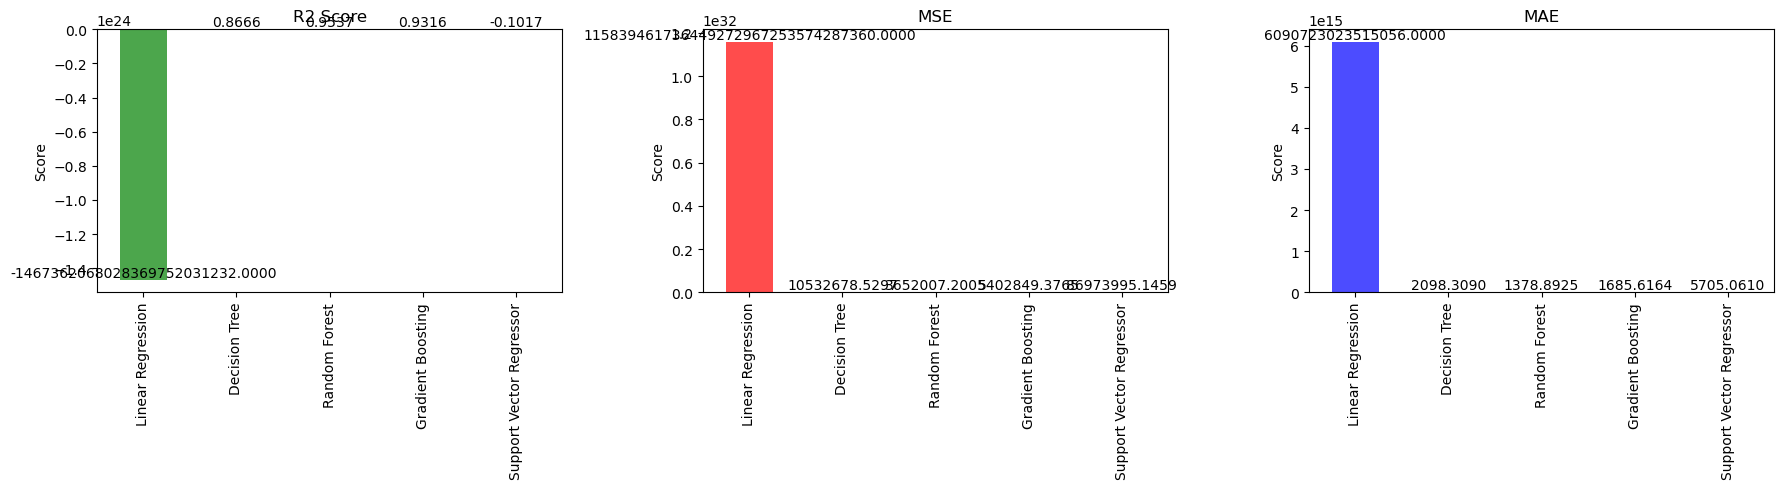

In [21]:
# Visualization of Model Performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ["R2 Score", "MSE", "MAE"]
colors = ["green", "red", "blue"]

def plot_metric(ax, metric, color):
    results_df.loc[metric].plot(kind='bar', ax=ax, color=color, alpha=0.7)
    ax.set_title(metric)
    ax.set_ylabel("Score")
    ax.set_xticklabels(results_df.columns, rotation=90)
    for i, v in enumerate(results_df.loc[metric]):
        ax.text(i, v, f"{v:.4f}", ha='center', va='bottom')

for ax, metric, color in zip(axes, metrics, colors):
    plot_metric(ax, metric, color)

plt.tight_layout()
plt.show()

In [24]:
# Identifying the best model
best_model = results_df.loc["R2 Score"].idxmax()
print(f"Best Performing Model: {best_model}")

### Feature Importance Analysis

# Feature Importance for tree-based models
""" Feature importance for tree-based models helps you understand which variables have the most influence on the model's predictions.
It tells you how much each feature contributes to the decision-making process."""
feature_importance = RandomForestRegressor(random_state=42).fit(X_train, y_train).feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
display(feature_df.head(10))

Best Performing Model: Random Forest


,Feature,Importance
7,enginesize,0.549018
6,curbweight,0.293698
14,highwaympg,0.041858
11,horsepower,0.028179
0,car_ID,0.019694
4,carwidth,0.011678
2,wheelbase,0.006137
3,carlength,0.005977
12,peakrpm,0.004968
13,citympg,0.004326


In [27]:
### Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
display(grid_search.best_params_)
display(grid_search.best_score_)

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

0.8783624106388542